In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import euclidean
%matplotlib inline

In [10]:
cd ../

/home/meni/Documents/PyCharm/pydp


In [12]:
from src.cluster import find
from tests.__non_private_cluster__ import *

In [14]:
xls = pd.ExcelFile('./test_data_sets/Data_Cortex_Nuclear.xls')
xls.sheet_names

[u'Hoja1']

In [41]:
df = xls.parse('Hoja1')
df.shape

(1080, 82)

In [194]:
dimension = 2
cols = np.random.randint(1,78,dimension)
dft = df[cols]
dft = dft.dropna()
dfm = dft.as_matrix()
precision = 10
dfm_round = np.round(dfm, precision)
dfm_round.shape

(1080, 2)

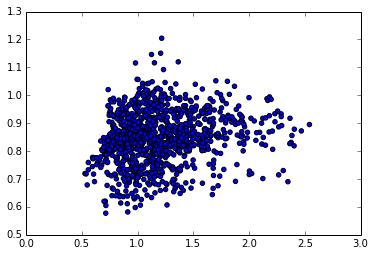

In [212]:
plt.scatter(*zip(*dfm_round))

In [195]:
desired_amount_of_points = 600
test_radius, test_center = find_cluster(dfm_round, desired_amount_of_points)
ball = sum(1 for p in dfm_round if euclidean(p, test_center) <= test_radius)
print "Test-radius: %f" % test_radius

Test-radius: 0.245980


In [223]:
iters = 20
max_domain = np.ceil(max(abs(np.min(dfm_round)), np.max(dfm_round)))
domain = (max_domain, 10**-precision)
approximation, failure, eps, delta = 0.1, 0.1, 0.5, 2**-10
radiuses, centers = [], []
clusters = []
for i in xrange(iters):
    try:
        radius, center = find(dfm_round, dimension, domain, desired_amount_of_points, approximation, failure, eps, delta)
        cluster = sum(1 for p in dfm_round if euclidean(p, center) <= radius)
    except ValueError:
        radius, center, cluster = np.nan, np.nan, np.nan
    radiuses.append(radius)
    centers.append(center)
    clusters.append(cluster)

In [224]:
print "Test-radius: %f" % test_radius
pd.concat([pd.Series(radiuses, name='radius'),pd.Series(clusters, name='cluster size')], axis=1)

Test-radius: 0.245980


,radius,cluster size
0,1.500,940
1,0.375,0
2,0.375,83
3,6.000,1080
4,0.375,0
5,0.375,0
6,0.750,0
7,0.375,318
8,0.375,0
9,0.750,0


In [225]:
radiuses = np.array(radiuses)
radiuses = radiuses[np.where(np.isfinite(radiuses))] 
clusters = np.array(clusters)
clusters = clusters[np.where(np.isfinite(clusters))] 

radiuses


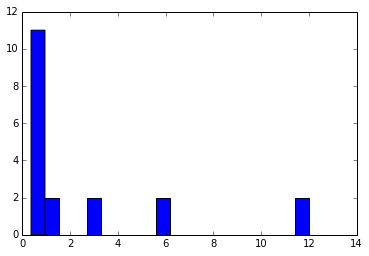

In [226]:
h = plt.hist(radiuses, bins=iters)
print 'radiuses'

clusters


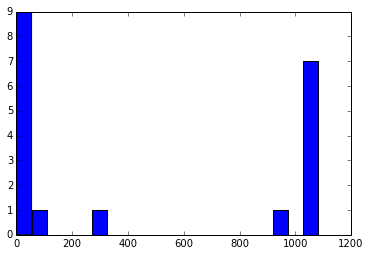

In [227]:
h = plt.hist(clusters, bins=iters)
print 'clusters'